# basic data import and plotting: Pandas

Pandas is a popular open source data analysis and manipulation tool built on top of the Python programming language. Data is organized in terms of tables called DataFrames. The Pandas `df.plot` command uses MatPlotLib to generate plots; you can add additional MatPlotLib commands to customize a plot. 

## import Python packages

In [1]:
import numpy as np # only need this once per program
import matplotlib as mpl
from matplotlib import pyplot as plt 
import pandas as pd

## import CSV data file
This program assumes the first row of the data file is the header text

:::{attention} 
The Pandas data package refers to data columns by header text. In the example below, the headers are `time (s)` and `C1 (V)`. In the original  WFM.CSV file provided by the oscilloscope, however, the header text for the time column was different from this.  To view and change the header text in a .csv file, you can open it in any spreadsheet program. Remember to save as .csv as well!  
:::

In [2]:
# create a folder called data inside the folder containing this python notebook
# put your data file inside that data folder 


file_name = 'WFM.CSV'               # replace with the name of your csv data file
file_folder = 'data/'              
data_file = file_folder + file_name
df = pd.read_csv(data_file)         # this tells pandas to read the csv file and create a 'data frame'  
                                    # df stands for 'data frame' which is a special type of spreadsheet 
# Display the first few rows to verify the import
print(df.head())

   time (s)    C1 (V)
0 -0.000001  0.011836
1 -0.000001 -0.017500
2 -0.000001 -0.017500
3 -0.000001  0.002070
4 -0.000001  0.021602


You see that Pandas has added an index column at the far left that was not included in the original data. 

:::{tip}
To generate a numerical python (NUMPY) array from a particular numbered row of the Pandas DataFrame, using the command `row_array = df.iloc[N].to_numpy()` replacing N with the number of the row you are interested in. For example, `row_array = df.iloc[0].to_numpy()` creates an array from row 0 of the dataframe, as shown below. 
:::

In [3]:
row_array = df.iloc[0].to_numpy()
print(row_array)

[-1.20000e-06  1.18359e-02]


## use the Pandas plot command to graph the data

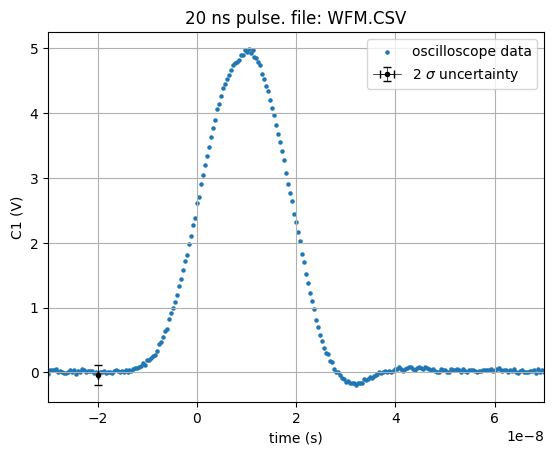

In [4]:

# use the Pandas dataplot command for a scatter plot 
# use the data column titled 'time (s)' for the horizontal axis
# use the data column titled 'C1 (V)' for the vertical axis
# want to plot a column titled 'C2 (V)' instead? just replace 'C1 (V)' below with 'C2 (V)' ! 
df.plot(kind = 'scatter', marker = '.', x = 'time (s)', y = 'C1 (V)', label = 'oscilloscope data')

# add a made up error bar
row_array = df.iloc[2950].to_numpy()
xerr_values = 0
yerr_values = 0.15
plt.errorbar(row_array[0], row_array[1], xerr= xerr_values,  yerr=yerr_values, marker = ".", color='black', capsize=3, linewidth = 0.5, label = r'2 $\sigma$ uncertainty')

# specify the range you want (omit if you want plot to autoscale) 
plt.xlim(-0.3e-7, 0.7e-7)
# plt.ylim( -1, 9) # this will autoscale the vertical axis 
plt.grid("both")  # replace "both" with "none" to remove
plt.legend()
plt.title("20 ns pulse. file: WFM.CSV") 
# generate plot
plt.show()

## export data to a csv spreadsheet
for completeness, we also show how to export a Pandas dataframe to a CSV file. There are many other commands for selecting particular data within a data frame. See [Getting Started with Pandas](https://pandas.pydata.org/getting_started.html) 

### create a dataframe 

In [5]:
# Example DataFrame (replace with your own data)
data = {
    'Name': ['John', 'Jane', 'Doe'],
    'Age': [30, 28, 45],
    'City': ['New York', 'Los Angeles', 'Chicago']
}
df = pd.DataFrame(data)

print(df.head())



   Name  Age         City
0  John   30     New York
1  Jane   28  Los Angeles
2   Doe   45      Chicago


### use `to_csv` to export to CSV

In [7]:
# Export the DataFrame to a CSV file named 'output_data.csv'. Put it in the data folder. 
df.to_csv('data/output_data.csv')